# Predicting Depression Based on Musical Taste

Having a background in psychology and having played guitar for over 15 years, music and mental health are two topics near and dear to me. It's well known that mental disorders affect millions worldwide, and their impact on individuals and society is significant. While the causes of mental disorders are complex and multifaceted, researchers have long recognized that environmental factors, such as social and cultural influences, can play a role in their development. Recently, there has been increasing interest in the potential link between music and mental health. Studies have shown that music can profoundly affect our emotional and psychological well-being, and it has been suggested that individuals with certain mental disorders may have distinct music preferences and behaviors related to music consumption.

This research paper will explore the relationship between mental disorders and music taste and how this relationship can be predicted using machine learning algorithms. Specifically, I will examine whether there are patterns in the music preferences and streaming behaviors of individuals with different mental disorders and whether these patterns can be used to develop accurate predictive models. 

To do so, I will rely on the MxMT (Music x Mental Health Traits) dataset, which is a survey dataset that contains responses from over 700 individuals about their music preferences and mental health traits. 
- Data collection was managed via a Google Form. 
- Respondents were not restricted by age or location. 
- The form was posted in various Reddit forums, Discord servers, and social media platforms. 
- Posters and "business cards" were also used to advertise the form in libraries, parks, and other public locations. 
- The survey was active from August to November 2022.
- The data can be freely accessed on Kaggle: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

The dataset was created to explore the relationship between music and mental health, and I will develop my model to advance our understanding of music and its role in mental health.

## Exploratory Data Analysis

The dataset contains 33 variables which can be roughly divided into 3 blocks:

Block 1, background: Questions focused on demographics and music preferences/habits.
- Permissions: A bookeeping item where respondents select "I understand" to the survey use and requirements
- Timestamp: A bookeeping item recording the time when respondents filled in a survey (timestamp)
- Age: Age of the participants (numerical, discrete)
- Primary streaming service: E.g., Spotify, Apple Music, etc. (categorical)
- Hours per day: Hours spent listening to music (numerical, discrete)
- While working: Whether participants listen to music while working (binary, yes/no)
- Instrumentalist: Whether the participant plays an instrument (binary, yes/no)
- Composer: Whether the participant composes music (binary, yes/no)
- Fav genre: Participant's favorite music genre, e.g., Latin, Rock, K pop, etc. (categorical)
- Exploratory: Whether the participant explores new music (yes/no)
- Foreign languages: Whether the participant lists to music in a foreign language (yes/no)
- BPM: Beats per minute of the music (numerical, discrete)

Block 2, music genres: Respondents answer how often they listen to music genres. Response options are never, rarely, sometimes, and very frequently.
- Frequency [Classical]	
- Frequency [Country]	
- Frequency [EDM]	
- Frequency [Folk]	
- Frequency [Gospel]	
- Frequency [Hip hop]	
- Frequency [Jazz]	
- Frequency [K pop]	
- Frequency [Latin]	
- Frequency [Lofi]	
- Frequency [Metal]	
- Frequency [Pop]	
- Frequency [R&B]	
- Frequency [Rap]	
- Frequency [Rock]	
- Frequency [Video game music]

Block 3, mental health: Respondents rank the presence of anxiety, depression, insomnia, OCD in themselves on a scale from 1-10, where 1 is that they do not experience this and 10 that they experiment it constantly.
- Anxiety	
- Depression	
- Insomnia	
- OCD	
- Music effects: Whether participants feel music improves or worsen mental health conditions

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # fundamental visualization
import seaborn as sns # advanced visualization built on top of matplotlib

In [2]:
df = pd.read_csv("mxmh_survey_results.csv")

In [3]:
# set max_columns option to None to show all columns
pd.set_option('display.max_columns', None)

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
# showing all variables within the dataframe as a list
print(list(df))

['Timestamp', 'Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions']


In [5]:
# printing type of data of each column
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [6]:
# summarizing numerical columns
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

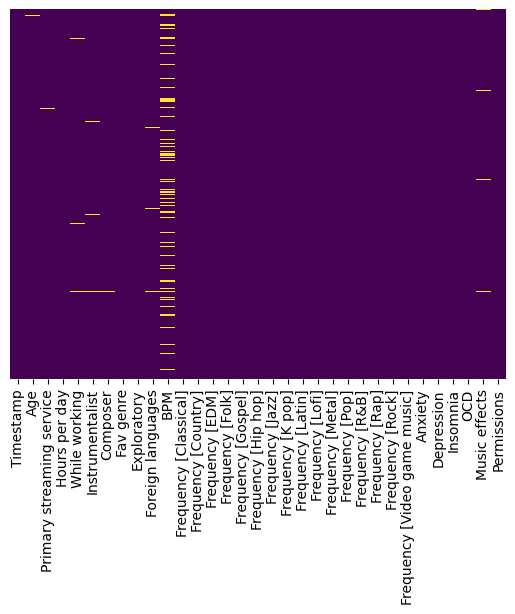

In [7]:
# assessing null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Hours per day'}>,
        <AxesSubplot:title={'center':'BPM'}>],
       [<AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Depression'}>,
        <AxesSubplot:title={'center':'Insomnia'}>],
       [<AxesSubplot:title={'center':'OCD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

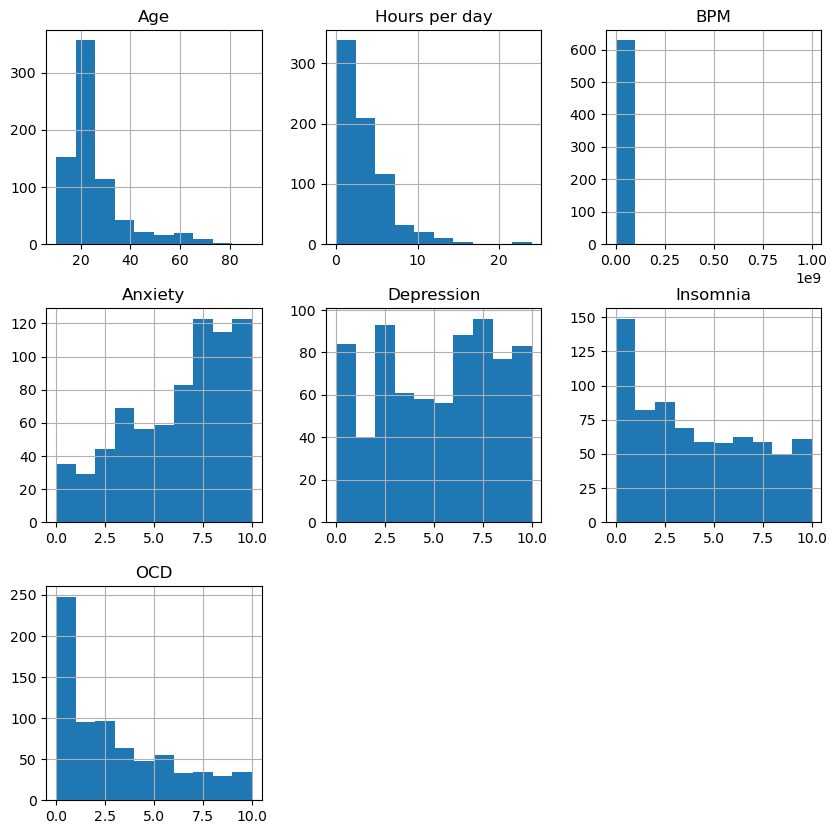

In [8]:
df.hist(figsize=(10, 10), bins=10)

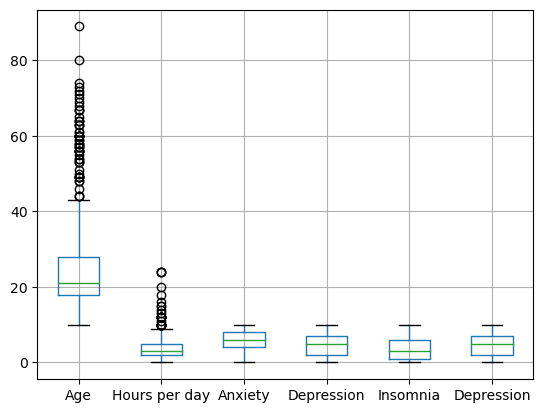

In [9]:
# create a boxplot of all columns
df[['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'Depression']].boxplot()

# display the plot
plt.show()

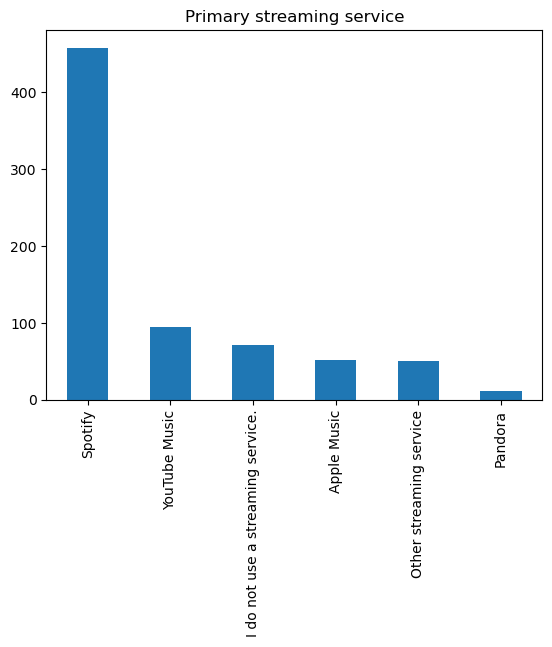

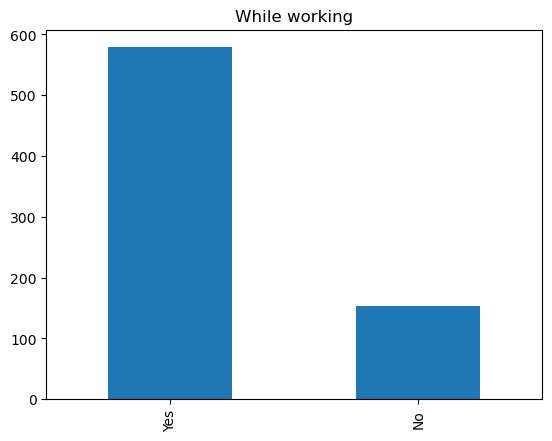

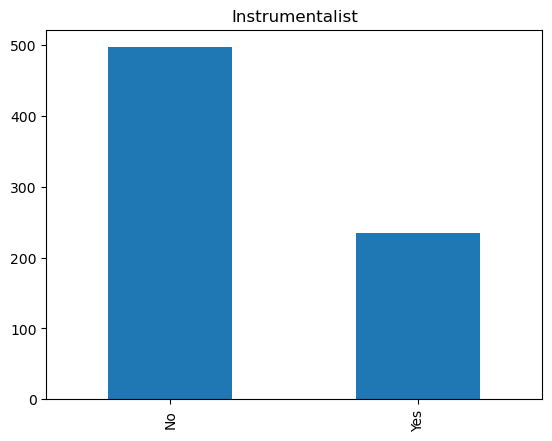

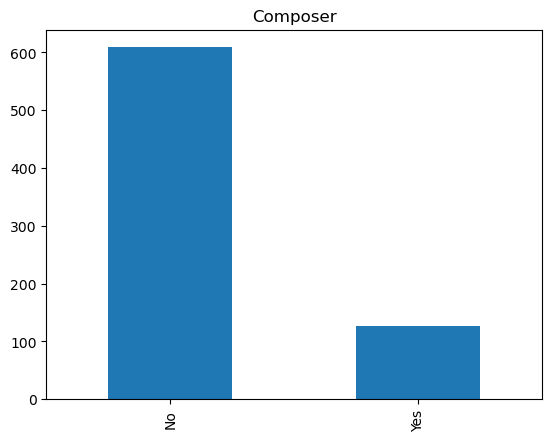

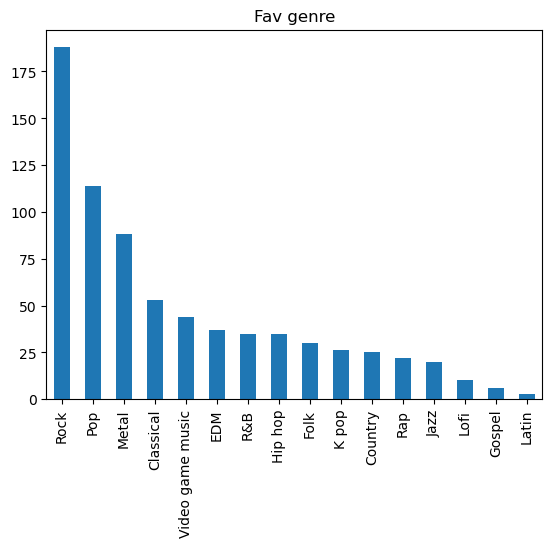

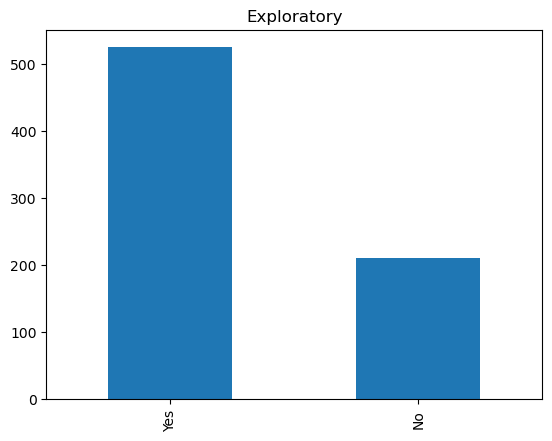

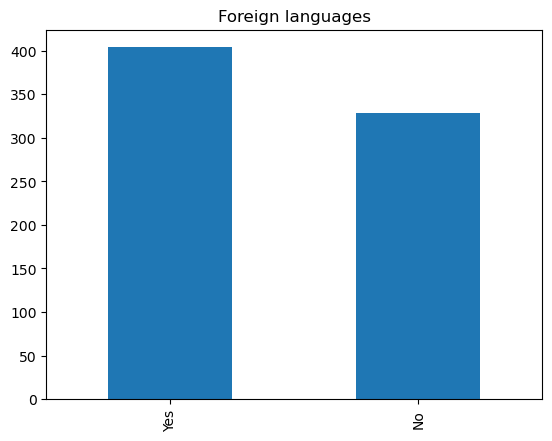

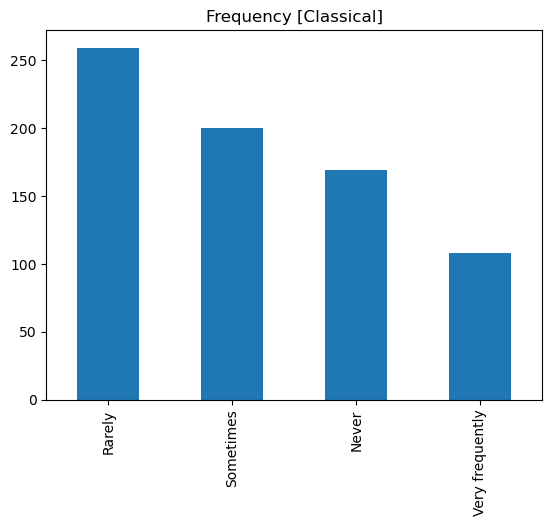

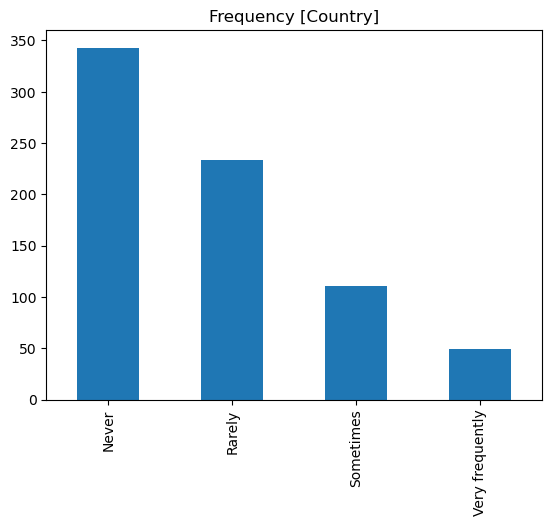

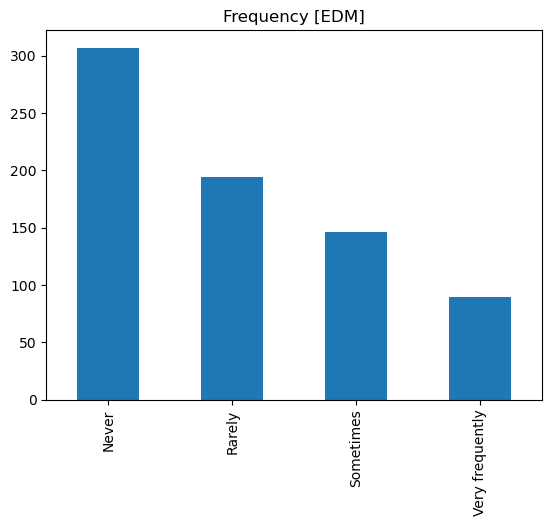

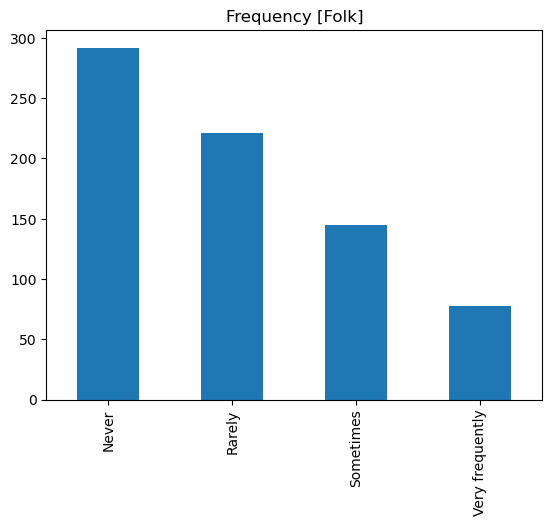

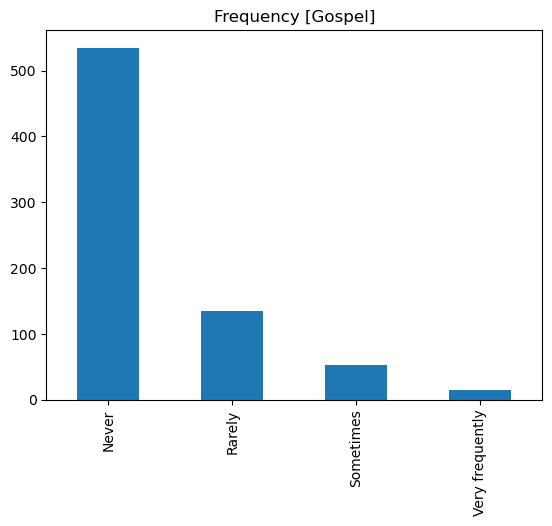

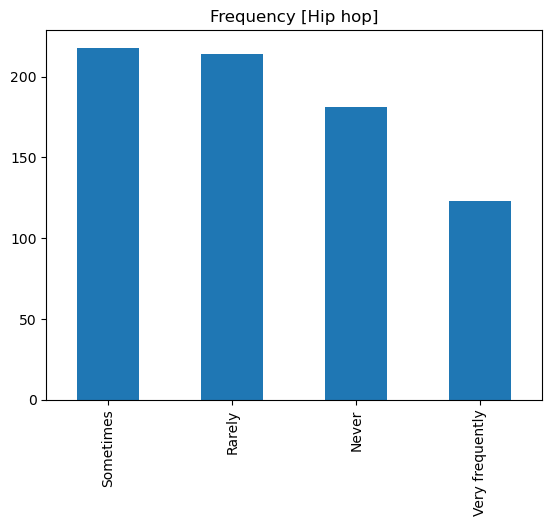

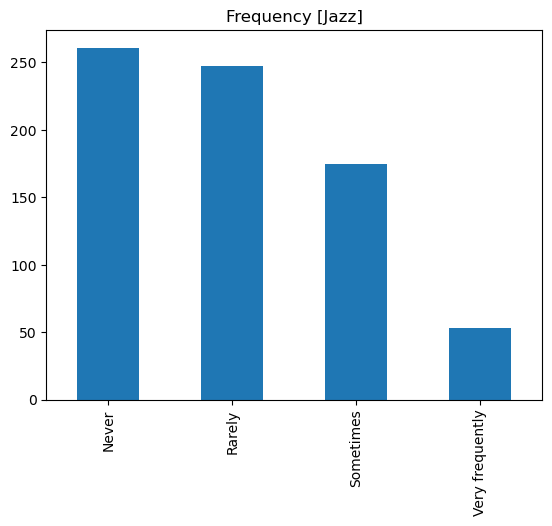

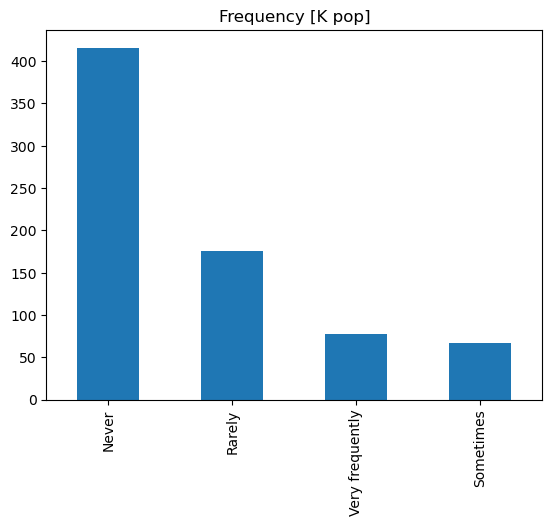

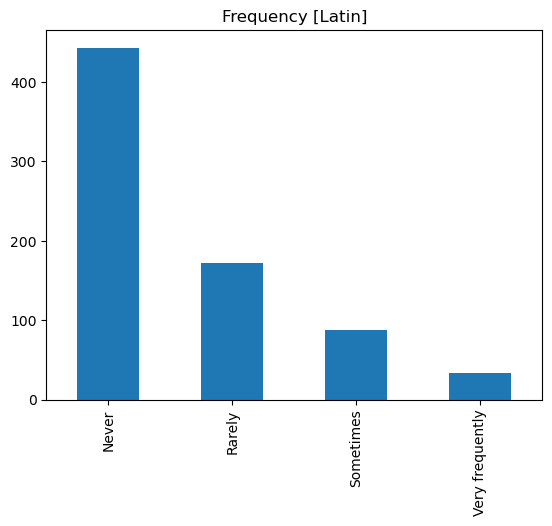

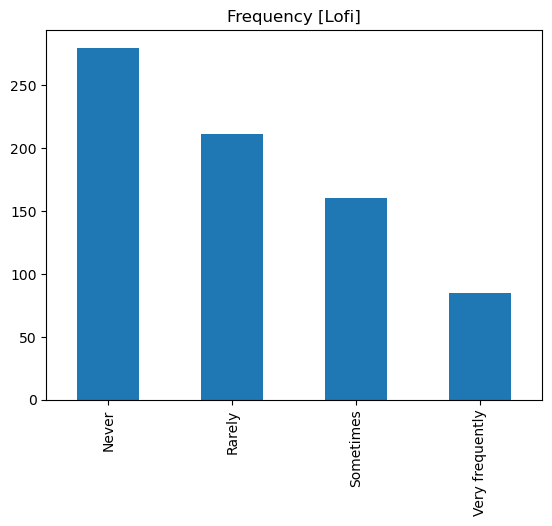

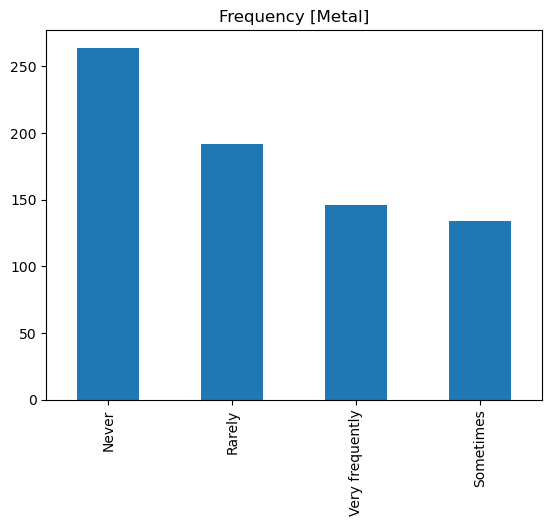

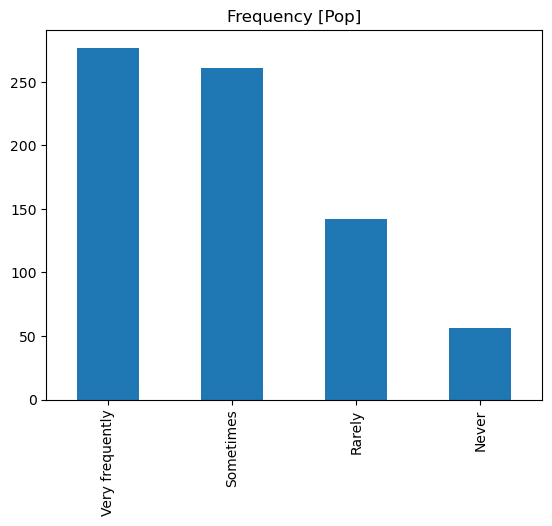

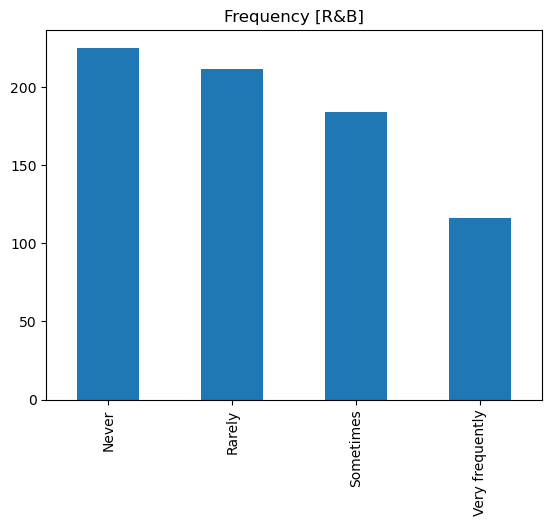

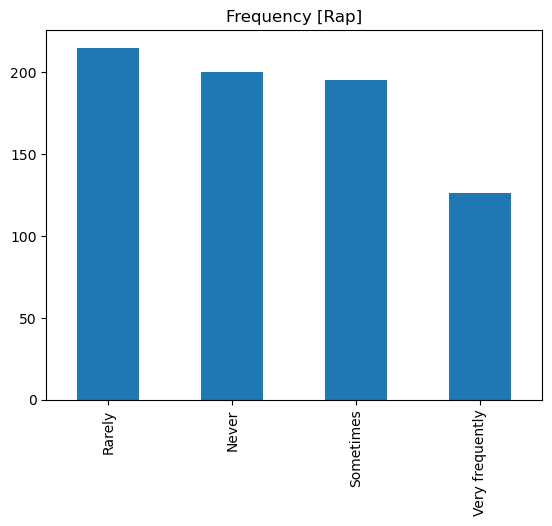

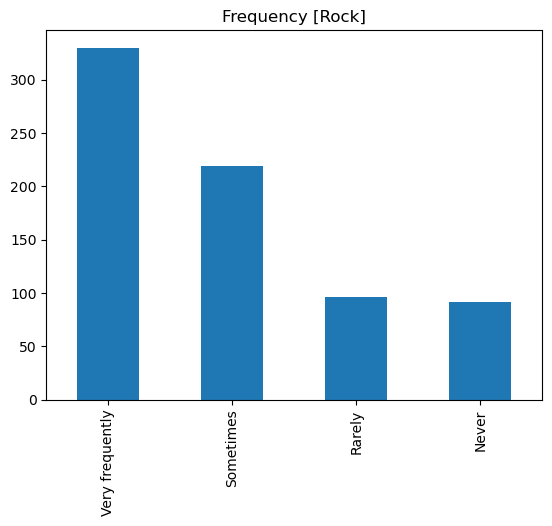

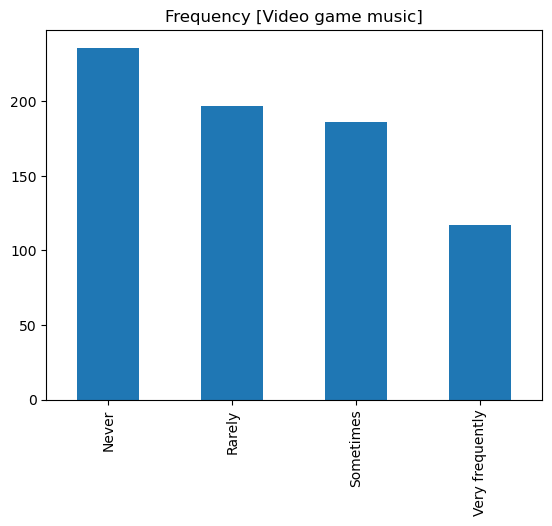

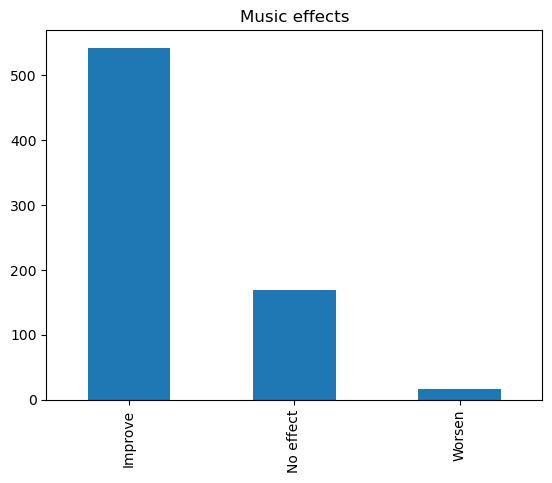

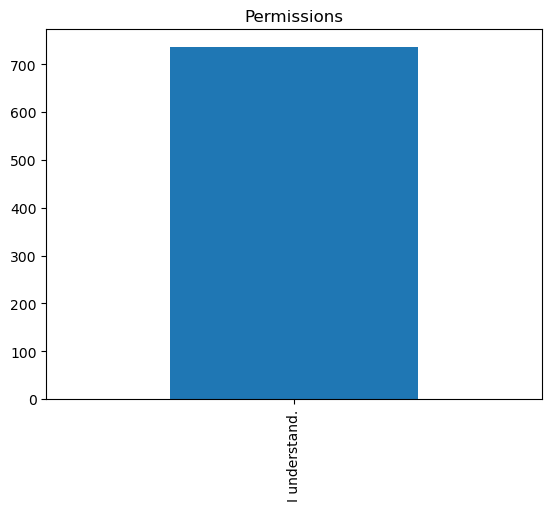

In [10]:
# loop through all columns in the dataframe
for column in df.columns:
    # skip the 'Timestamp' column
    if column == 'Timestamp':
        continue
    # check if the column is not of data type float64
    if df[column].dtype != 'float64':
        # create a bar plot of the value counts for non-float64 columns
        counts = df[column].value_counts()
        counts.plot(kind='bar')
        plt.title(column)  # add a title with the name of the column
        plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# loop over all columns in the dataframe
for column in df.columns:
    # check if the column is not of float data type
    if df[column].dtype != 'float64':
        # apply label encoder to the column
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

<AxesSubplot:>

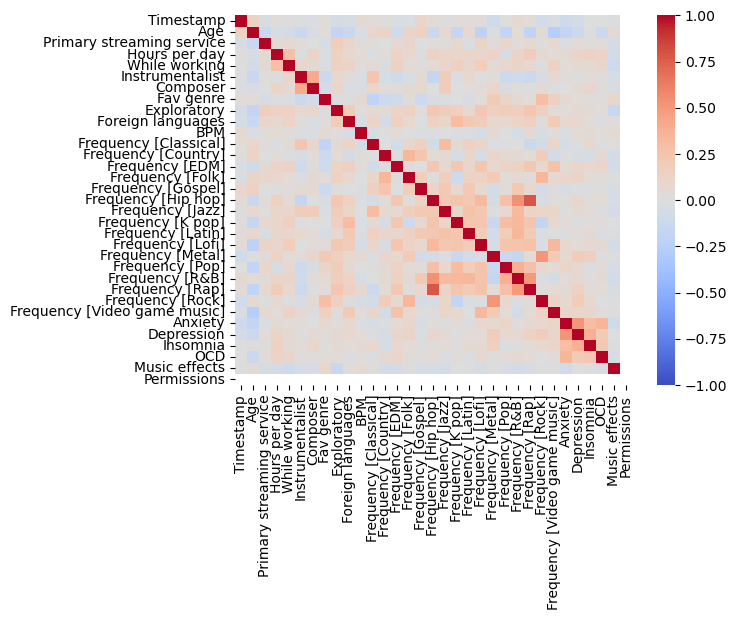

In [12]:
sns.heatmap(df.corr()
            , cmap='coolwarm'
            , vmin=-1, vmax=1
            , xticklabels=df.corr().columns.values
            , yticklabels=df.corr().columns.values)

In conclusion from the exploratory section:
- BPM has a high degree of missing data, therefore this variable will be excluded from the analysis.
- Most respondents are 18-30 years old. However, there is also a great presence of people 45-75 years old, and (allegedly) even 90 years old.
- Most respondents spend 1-5 hours a day listening to music. However, there are some outliers that allegedly listen for more than 10, or even 20 hours. This is probably a mistake and must therefore be treated.
- Spotify is, by far, the most popular streaming service.
- Most listen to music while working, most do not listen to instrumental music, most don't compose music, most frequently explore different music genres, and most listen to music in a language they are not fluent.
- Rock is the most popular genre, followed by pop and metal.
- Out of the mental disorders analyzed, anxiety and deperssion are the ones experienced the most whereas OCD and insomnia are the least common. 
- 74% of the respondents say music improves their mental health.
- From the correlation matrix, all mental disorders are positively correlated amongst themselves. In the music genre realm, those who listen to rap also seem to listen to hip hop (they are highly correlated). Age seems to be negatively correlated with several indicators, such as anxiety, video game music, rap, lofi and exploratory pursuit of music.

That said, this analysis will be focused on attempting to predict the presence of depression - and this variable will be further transformed. More on that in the following sections.

# Evaluation Metric

Even though the outcome variable (level of depression) is numerical and discrete (1-10), the values are discrete so it may be better to treat this as a classification problem. In particular, the dependent variable (depression) will be transformed so that values 0-5 are 0 (absence of depression) and values 6-10 are 1 (presence of depression).

Given that this project will follow a classification approach, common metrics to evaluate models include accuracy, F1 score and macro F1 score. However, caution should be advised when using accuracy with imbalanced classes - such as the case of this project. **Accuracy will still be calculated, but given that only a minority of people say they have depression (i.e., classes are imbalanced), the macro F1 score will be the main metric used to evaluate the model's performance.**

Below are the metrics that will be evaluated and what each one aims to resolve:
- Accuracy: We will use this metric to measure the percentage of correctly classified instances out of the total number of instances in the dataset.
- F1 Score: We will use this metric to measure the mean of precision and recall.
- Macro F1 Score: We will use this metric to calculate the F1 score for each class. This will help evaluate the model's performance across all possible categories, even if one is imbalanced. Similarly to the F1 score, it also takes into account precision and recall.

# Data Preprocessing

As mentioned at the end of the EDA section, there are some variables that include potential outliers as well as null entries. The possible errors are minimal, but still worth altering. In particular, we will deal with the following variables:
- Create a dataframe that includes only the variables of interest
- Remove null values
- Deal with outliers in the daily hours spent listening to music
- Transform dependent variable (depression, originally 1-10) to binary (1-5 will be 0, 6-10 will be 1)
- Encode categorical columns (including the target variable)
- Round values in the target variable column

In [13]:
# read in data again in case any changes were made during the EDA
df = pd.read_csv("mxmh_survey_results.csv")

## Select Variables of Interest

I will start off by removing other mental illnesses as we found that these are highly correlated to depression (additionally, if we want to predict depression, it would be best to not ask for other mental disorders). Further, I have removed some items that were redundant (e.g., asking for favorite genre and then asking for how frequently people listen to several genres). I also removed variables that I don't deem as relevant in a scalable survey (e.g., not everyone might have a primary streaming service, especially in less globalized parts of the world)

In [14]:
# creating new dataframe excluding variables that are NOT of interest
df = df.drop(['Timestamp', 'BPM', 'Anxiety', 'OCD', 'Insomnia', 'Permissions'
              , 'Music effects', 'Fav genre', 'Primary streaming service'
             ], axis=1)

## the rest of the variables, for model experimentation
# , 'Frequency [Metal]','Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]'
# , 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]'
# , 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Pop]', 'Frequency [R&B]'
# , 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'
# , 'Age', 'Hours per day'
# , 'Foreign languages', 'Exploratory', 'While working'
# , 'Instrumentalist', 'Composer'

## Remove Nulls

In [15]:
# Remove all rows with null values
df = df.dropna()

<AxesSubplot:>

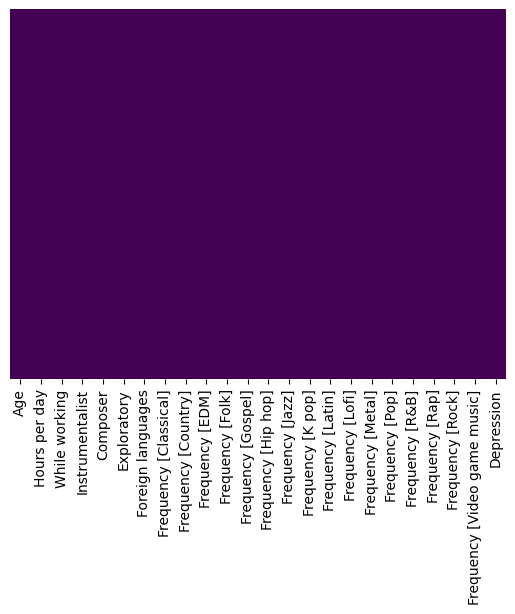

In [16]:
# sanity check to assess if we indeed removed all null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Treat Outliers

In [17]:
# treat outliers in the hours spent listening to music
## some people said they spend over 10 hours listening to music
## while this is indeed possible, I will treat it as trolls or simply incorrect answers
## I will use an arbitrary cut off value - anything above 10 hours will be limited to 10 hours
df['Hours per day'] = df['Hours per day'].apply(lambda x: 10 if x > 10 else x)

<AxesSubplot:>

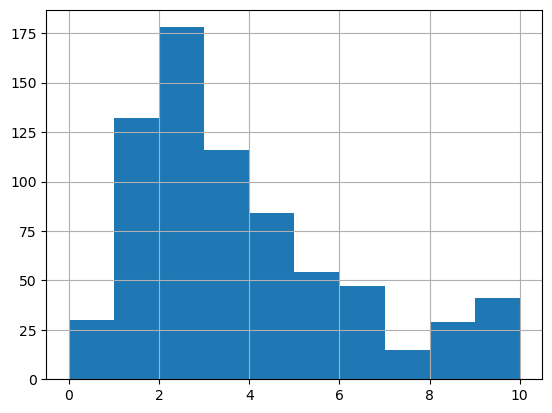

In [18]:
# sanity check to assess if we indeed have no values above 10
df['Hours per day'].hist()

## Recode Outcome Variable

In [19]:
# Recode depression levels 0-10 to a binary variable
# anything from 0-5 will be 0, anything from 6-10 will be 1
df['Depression'] = df['Depression'].apply(lambda x: 0 if x <= 6 else 1)

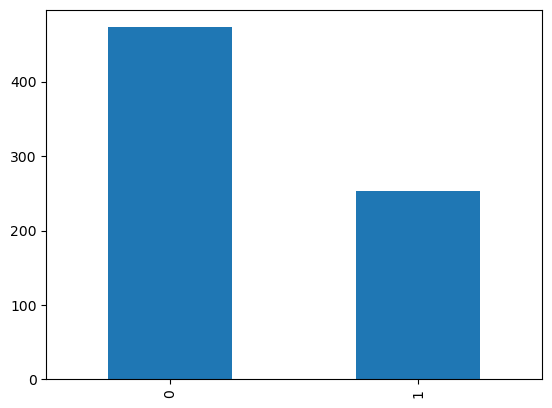

In [20]:
# sanity check to assess if data was recoded correctly
# count the occurrences of each category
counts = df['Depression'].value_counts()

# plot the result using a bar plot
counts.plot(kind='bar')

# show the plot
plt.show()

In [21]:
# set max_columns option to None to show all columns
pd.set_option('display.max_columns', None)

# a final look at the resulting dataframe before modeling
df.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Depression
0,18.0,3.0,Yes,Yes,Yes,Yes,Yes,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,0
1,63.0,1.5,Yes,No,No,Yes,No,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,0
2,18.0,4.0,No,No,No,No,Yes,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,1
3,61.0,2.5,Yes,No,Yes,Yes,Yes,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,1
4,18.0,4.0,Yes,No,No,Yes,No,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,0


## Encode Categorical Variables

In [22]:
# encode categorical columns
from sklearn.preprocessing import LabelEncoder

# create label encoder instance
lb_make = LabelEncoder()

# loop over all columns in the dataframe
for column in df.columns:
    # check if the column is not of float data type
    if df[column].dtype != 'float64':
        # apply label encoder to the column
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
# convert mental disorders to a category        
df['Depression'] = lb_make.fit_transform(df['Depression'])

In [23]:
# set max_columns option to None to show all columns
pd.set_option('display.max_columns', None)

# a final look at the resulting dataframe before modeling
df.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Depression
0,18.0,3.0,1,1,1,1,1,1,0,1,0,0,2,0,3,3,1,0,3,2,3,0,2,0
1,63.0,1.5,1,0,0,1,0,2,0,0,1,2,1,3,1,2,1,0,2,2,1,3,1,0
2,18.0,4.0,0,0,0,0,1,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,1
3,61.0,2.5,1,0,1,1,1,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,1
4,18.0,4.0,1,0,0,1,0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,0


In [24]:
# export resulting dataframe to csv
df.to_csv('mxmh_clean.csv')

In [25]:
## PRINCIPAL COMPONENT ANALYSIS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# separate the target variable (level/presence of mental illness)
target = df['Depression']

# drop the target variable from the dataset
data = df.drop(['Depression'], axis=1)

# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# instantiate PCA with the number of components you want to keep
pca = PCA(n_components=5)

# fit and transform the data using PCA
pca_data = pca.fit_transform(data_scaled)

# see how much variance each component explains
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# print the loadings of each variable on each principal component
loadings = pd.DataFrame(pca.components_, columns=data.columns)
print('Loadings:', loadings)

Explained variance ratio: [0.15981261 0.09605294 0.08374876 0.0775979  0.05713898]
Loadings:         Age  Hours per day  While working  Instrumentalist  Composer  \
0 -0.128276       0.162096       0.158618        -0.018783  0.044500   
1 -0.081011      -0.162957      -0.115188        -0.250182 -0.257505   
2  0.396778      -0.129973      -0.111727         0.097599  0.081570   
3 -0.204667      -0.010148       0.176816         0.447441  0.246178   
4 -0.133920       0.201025      -0.000293         0.320543  0.491324   

   Exploratory  Foreign languages  Frequency [Classical]  Frequency [Country]  \
0     0.222386           0.213104               0.053627             0.046839   
1    -0.163213          -0.041937              -0.203485            -0.225467   
2    -0.123940          -0.130284               0.257903             0.204845   
3    -0.000279           0.140021               0.335393            -0.319021   
4     0.196628          -0.295796              -0.204195            -

# Fit Models

First, we will begin by splitting the data into a training set and a testing set.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the dataframe into a feature matrix and a target vector
X = df.drop('Depression', axis=1)  # selecting everything but the target variable
y = df['Depression']  # selecting the target variable

# create instance with scaler function
scaler = StandardScaler()

# rescale independent variables
X = scaler.fit_transform(X)

#30% of the train.csv is assigned to the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

Then, we will proceed with the actual fitting. While the predicted variable is numerical (1-10), the values are discrete and are, therefore, better suited for a classification model. With that in mind, these are the models that will be tested:
- K Nearest Neighbors
- Naive Bayes
- Decision Tree
- Support Vector Machines
- Linear Discriminant Analysis

## K Nearest Neighbors

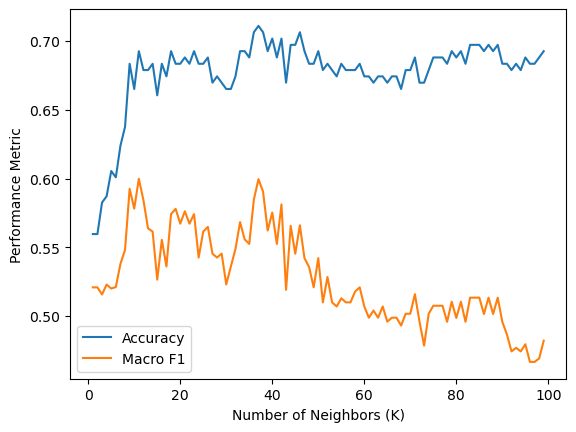

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a list of K-values to test
k_values = [i for i in range(1, 100)]

# Create empty lists to store the performance metrics for each value of K
acc_scores = []
f1_scores = []

# Fit the KNN model for each value of K and calculate the performance metrics
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Plot the performance metrics for each value of K
plt.plot(k_values, acc_scores, label='Accuracy')
plt.plot(k_values, f1_scores, label='Macro F1')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# create instance with knn function and parameter
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')

# fit the model
knn.fit(X_train, y_train)

# generate predictions
predictions_knn = knn.predict(X_test)

# create classification report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       147
           1       0.53      0.28      0.37        71

    accuracy                           0.68       218
   macro avg       0.62      0.58      0.58       218
weighted avg       0.65      0.68      0.65       218



## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# generate instance with naive bayes function
nb_model = GaussianNB()

# fit model
nb_model.fit(X_train, y_train)

# generate predictions
predictions_nb = nb_model.predict(X_test)

# create classification report
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       147
           1       0.44      0.46      0.45        71

    accuracy                           0.63       218
   macro avg       0.59      0.59      0.59       218
weighted avg       0.64      0.63      0.64       218



## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

# initialize the decision tree classifier
clf = DecisionTreeClassifier()

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test data
predictions_dtc = clf.predict(X_test)

# print the classification report
print(classification_report(y_test, predictions_dtc))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       147
           1       0.33      0.30      0.31        71

    accuracy                           0.58       218
   macro avg       0.51      0.51      0.50       218
weighted avg       0.57      0.58      0.57       218



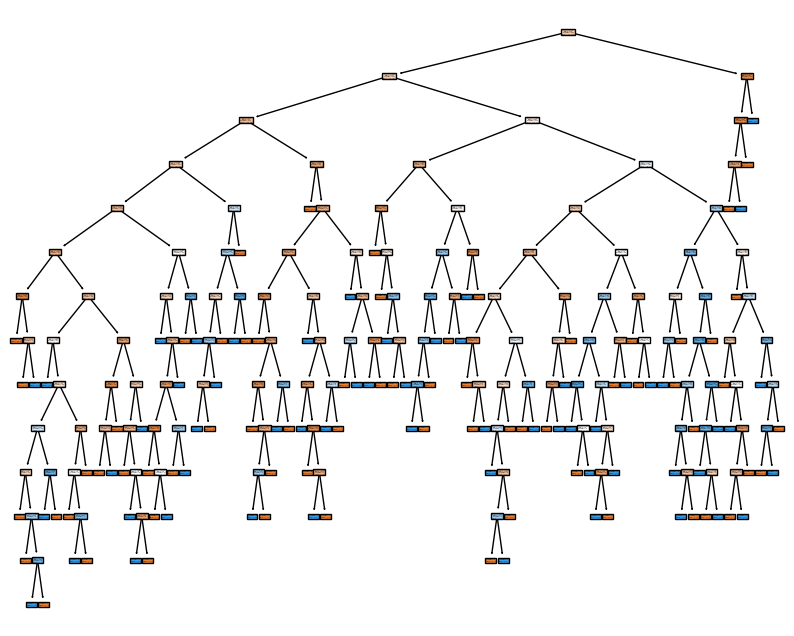

In [31]:
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()

## Support Vector Machines

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create an SVM classifier object
svc = svm.SVC()

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Create a GridSearchCV object with the SVM classifier and parameter grid
grid_search = GridSearchCV(svc, param_grid, scoring='f1_macro', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create an SVM classifier with the best parameters
svc = svm.SVC(**best_params)

# Fit the model on the training data using the best parameters
svc.fit(X_train, y_train)

# Make predictions on the test data using the best model
predictions_svm = svc.predict(X_test)

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Print the classification report
print(classification_report(y_test, predictions_svm))

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.5308282313875399
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       147
           1       0.51      0.31      0.39        71

    accuracy                           0.68       218
   macro avg       0.62      0.58      0.58       218
weighted avg       0.65      0.68      0.65       218



## Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

# create instance with linear discriminant analysis function
lda = LinearDiscriminantAnalysis()

# fit model
lda.fit(X_train, y_train)

# generate predictions
predictions_lda = lda.predict(X_test)

# create classification report
print(classification_report(y_test, predictions_lda))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       147
           1       0.48      0.20      0.28        71

    accuracy                           0.67       218
   macro avg       0.59      0.55      0.53       218
weighted avg       0.63      0.67      0.62       218



# Model Comparison

In [34]:
# running a cross validation after having tuned each model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

# define the classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=15, weights='distance'),
    DecisionTreeClassifier(),
    SVC(**best_params), # C=10, gamma=0.1, kernel='rbf'
    GaussianNB(),
    LinearDiscriminantAnalysis()
]

# iterate over classifiers and get scores
for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    f1_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
    print("Accuracy: %0.2f (+/- %0.2f) Macro F1 score: %0.2f (+/- %0.2f) [%s]" % (scores.mean()
                                                                            , scores.std()
                                                                            , f1_scores.mean()
                                                                            , f1_scores.std()
                                                                            , clf.__class__.__name__))

Accuracy: 0.66 (+/- 0.04) Macro F1 score: 0.56 (+/- 0.04) [KNeighborsClassifier]
Accuracy: 0.57 (+/- 0.06) Macro F1 score: 0.53 (+/- 0.07) [DecisionTreeClassifier]
Accuracy: 0.65 (+/- 0.04) Macro F1 score: 0.57 (+/- 0.05) [SVC]
Accuracy: 0.60 (+/- 0.04) Macro F1 score: 0.57 (+/- 0.03) [GaussianNB]
Accuracy: 0.64 (+/- 0.02) Macro F1 score: 0.49 (+/- 0.02) [LinearDiscriminantAnalysis]


The models resulted in varying levels of performance, bias and variance, flexibility, and interpretability. As a reminder, even though accuracy was calculated, ultimately the Macro F1 score will be the main metric being assessed.

- KNeighborsClassifier: KNN models, in general, are relatively straightforward and interpretable as they classify new instances based on the class labels of its neighboring points, making it easier to understand and explain.  KNN models are also flexible as they can adjust decision boundaries based on the density of the neighboring data points. The model's performance is moderate but not exceptional. The relatively low standard deviation indicates that the model's performance is consistent across different subsets of the data, suggesting low variance. Given that the problem of mental health is inherently complex, KNN models tend to introduce less bias by capturing complex relationships.

- DecisionTreeClassifier: Decision trees offer interpretability, as the decision rules and splits can be easily visualized and understood. Decision trees also tend to be flexible as they can represent complex decision boundaries and capture non-linear relationships in the data. The present model achieves a moderate performance and has slightly higher variability in performance. The larger standard deviation of the F1 score indicates higher variance across different subsets of the data. The model might be more sensitive to the specific training instances, potentially indicating higher variance and lower bias. 

- SVC (Support Vector Classifier): Support vector machines can be less interpretable due to the complexity of the decision boundaries generated in high-dimensional spaces. Despite the decreased interpretability, SVC models are  flexible as they can capture complex relationships through the use of different kernel functions. The model achieves a  moderate performance, similar to the K-nearest neighbors model. The small standard deviation suggests relatively low variance, indicating consistent performance across different subsets of the data. Since the problem at hand is predicting mental disorders which is likely non-linear, it is also likely this model introduces greater bias as it assumes linearity.

- GaussianNB (Gaussian Naive Bayes): Gaussian Naive Bayes offers interpretability as it relies on the probabilistic framework of Bayes' theorem. The model's predictions can be explained based on the likelihoods and priors associated with the class labels. GNB tend to be less flexible when compared to other models because it assumes independence between features given the class. The model's performance is moderate but not outstanding. The small standard deviation indicates relatively low variance, suggesting consistent performance across different subsets of the data. Given that these type of models tend to be less flexible, and that the present problem is complex, it is likely this model introduces greater bias.

- LinearDiscriminantAnalysis: LDA is interpretable since it models the class separation using linear combinations of features. LDA assumes linearity between classes, which might make it struggle to capture complex non-linear relationships. Even though the present model has the lowest standard deviation, which suggests it performs consistently across subsets of the data, it also has the lowest Macro F1 score. Lastly, in terms of bias, since these type of models assume linearity, it is likely introducing bias as the problem of mental health is likely non-linear.


In summary, based on the provided metrics, the models' performances range from moderate to relatively consistent (based on the accuracy and standar deviation). Flexibility varies across models, with K-nearest neighbors and decision trees being more flexible, while interpretability ranges from high (K-nearest neighbors, decision trees, Gaussian Naive Bayes) to relatively lower (SVC, Linear Discriminant Analysis). Since we are dealing with a nuanced problem such as predicting mental disorders, it is likely the models that assume linearity (SVC, GNB, LDA) introduce greater bias than those that are able to better capture non-linear relationships (KNN and Decision Trees).

With all that said and done, **I would choose K-Nearest Neighbors as the best performing model**: it has the highest accuracy, it has one of the highest Macro F1 scores, it is highly interpretable, it is highly flexible, it has relatively low variance and likely introduces less bias due to its ability to capture non-linear relationships.

# Ethical Implications

As with any machine learning model that attempts to predict something within the realm of social science, there are ethical considerations to be had. For starters, the way I see it, the ratio of depressed participants versus those not depressed was roughly 2:1, and if the models had ~60% accuracy, you may be better off flipping a coin.

Second, and perhaps most importantly, we should be cautious when we're dealing with mental health. The topic is, in and of itself, nuanced and entails dealing with the livelihoods of people. Mental health is nuanced, and the model has an arbitrary assumption of people responding 0-5 as them not having depression - but if they responded 6-10, I determined they do have depression - i.e., not a nuanced approach.

But back to the ethical implications - imagine if we created a more accurate model, would we still want to predict mental disorders based on music taste? If we ever went down that route, certain type of music could be at risk of being banned because it could be considered a threat to public health. This could protect people's mental health, but it could also thwart freedom of speech and could be at risk of marginalizing segments of a population.

Related to the freedom of speech, how would we attempt to protect people's mental health? Tapping into streaming apps could be a way of obtaining data. But these services also have personal information, therefore, if we decided to go that route, we could invade people's privacy.

On the topic of streaming services, another potential implication to keep in mind is - who would use this type of model? It is one thing if it is used by the government to foster mental wellness - but, what if law enforcement agencies or other industry were to benefit from this? Again, since we are talking about health concerns, there should be a tight control of who makes decisions on such type of model.

In conclusion, I believe music and mental health are highly complex topics and the dataset used in this project falls short in providing the variables needed to capture this relationship. Music is intertwined with sociocultural practices and it is hard to ask for all of the aspects involved. As for mental health, self reported measures are always debatible and there are many more factors to take into consideration, such as history of mental illness and whether a person has actually been diagnosed. Nonetheless, at least we know which musical variables are NOT enough to predict mental disorders.